In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
#import statsmodels.api as sm
import lightgbm as lgb
import xgboost
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import * 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.genmod.families import Binomial
from scipy.special import gammaln as lgamma
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from scipy.interpolate import make_interp_spline
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 高清图

D:\Program\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
from catboost import CatBoostClassifier

In [4]:
from IPython.core.debugger import Pdb

In [5]:
import plotly.io as pio
pio.renderers.default='notebook'

In [6]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [7]:
from bokeh.plotting import figure,show,output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

In [8]:
# 比较好用的一个办法
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last"
from IPython.display import display
# 可选参数'all'，'last'，'last_expr'，'none'，'last_expr_or_assign'

In [9]:
# 为了保证数据结构相同，我们需要在result中添加一列
def data_clean(df):
    int_ind = df.dtypes[df_train.dtypes!=object].index
    obj_ind = df.dtypes[df_train.dtypes==object].index #提取types为object的列名
    ndf = df[int_ind.sort_values()]
    temp2 = ndf.iloc[:,1:6].apply(lambda x:x**2,axis=0)
    temp3 = ndf.iloc[:,1:6].apply(lambda x:x**3,axis=0)
    temp2.columns = list(map(lambda x:x+'**2',list(temp2.columns)))
    temp3.columns = list(map(lambda x:x+'**3',list(temp3.columns)))
    ndf = ndf.join(temp2)
    ndf = ndf.join(temp3)
    for val in obj_ind:
        pp = pd.get_dummies(df[val],prefix=val,prefix_sep='_')
        ndf = ndf.join(pp)
    ndf.iloc[:,1:16] = ndf.iloc[:,1:16].apply(lambda x:(x-x.mean())/x.std(),axis=0)
    return ndf

In [10]:
df_train = pd.read_csv('Train.csv')
df_train.head()

,年龄,工作情况,教育,教育时间,婚姻状况,职业类型,家庭角色,民族,性别,投资收入,投资损失,工作天数,省份,Y
0,35,个体,初三,5,已婚平民配偶,其他职业,丈夫,民族D,男,0,0,40,省份22,0
1,37,中央部委,高中生,9,已婚平民配偶,保安,丈夫,民族D,男,0,0,40,省份8,0
2,19,个体,初三,5,未婚,手工艺维修,孩子,民族D,男,0,0,20,省份8,0
3,33,个体,大学生,13,已婚平民配偶,专业技术,丈夫,民族D,男,0,0,60,省份8,1
4,22,个体,大学未毕业,10,未婚,手工艺维修,离家,民族D,男,0,0,40,省份8,0


In [11]:
df_train.shape

(38842, 14)

# 数据清洗

In [12]:
import plotly.io as pio
pio.renderers.default='notebook'

In [13]:
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last"
from IPython.display import display
# 可选参数'all'，'last'，'last_expr'，'none'，'last_expr_or_assign'

In [14]:
# 为了保证数据结构相同，我们需要在result中添加一列
def data_clean(df):
    int_ind = df.dtypes[df_train.dtypes!=object].index
    obj_ind = df.dtypes[df_train.dtypes==object].index #提取types为object的列名
    ndf = df[int_ind.sort_values()]
    temp2 = ndf.iloc[:,1:6].apply(lambda x:x**2,axis=0)
    temp3 = ndf.iloc[:,1:6].apply(lambda x:x**3,axis=0)
    temp2.columns = list(map(lambda x:x+'**2',list(temp2.columns)))
    temp3.columns = list(map(lambda x:x+'**3',list(temp3.columns)))
    ndf = ndf.join(temp2)
    ndf = ndf.join(temp3)
    for val in obj_ind:
        pp = pd.get_dummies(df[val],prefix=val,prefix_sep='_')
        ndf = ndf.join(pp)
    ndf.iloc[:,1:16] = ndf.iloc[:,1:16].apply(lambda x:(x-x.mean())/x.std(),axis=0)
    return ndf

In [15]:
df_train = pd.read_csv('Train.csv')
df_train.head()

,年龄,工作情况,教育,教育时间,婚姻状况,职业类型,家庭角色,民族,性别,投资收入,投资损失,工作天数,省份,Y
0,35,个体,初三,5,已婚平民配偶,其他职业,丈夫,民族D,男,0,0,40,省份22,0
1,37,中央部委,高中生,9,已婚平民配偶,保安,丈夫,民族D,男,0,0,40,省份8,0
2,19,个体,初三,5,未婚,手工艺维修,孩子,民族D,男,0,0,20,省份8,0
3,33,个体,大学生,13,已婚平民配偶,专业技术,丈夫,民族D,男,0,0,60,省份8,1
4,22,个体,大学未毕业,10,未婚,手工艺维修,离家,民族D,男,0,0,40,省份8,0


In [16]:
# 对object类型的变量全部进行分类处理，即实现One-Hot编码
int_ind = df_train.dtypes[df_train.dtypes!=object].index
obj_ind = df_train.dtypes[df_train.dtypes==object].index #提取types为object的列名
for val in obj_ind:
    globals()['df_train_{}'.format(val)] = pd.get_dummies(df_train[val],prefix=val,prefix_sep='_')

In [17]:
df_train.describe()

,年龄,教育时间,投资收入,投资损失,工作天数,Y
count,38842.000000,38842.000000,38842.000000,38842.000000,38842.000000,38842.000000
mean,38.676613,10.089851,1096.261907,87.989470,40.388240,0.239921
std,13.732165,2.577300,7547.487571,403.268938,12.419557,0.427040
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [19]:
df_train.dtypes

年龄       int64
工作情况    object
教育      object
教育时间     int64
婚姻状况    object
职业类型    object
家庭角色    object
民族      object
性别      object
投资收入     int64
投资损失     int64
工作天数     int64
省份      object
Y        int64
dtype: object

无任何缺失值，因为题目中说了数据非常可信。

In [24]:
df_train.apply(lambda x:sum(x.isnull()),axis=0)

年龄      0
工作情况    0
教育      0
教育时间    0
婚姻状况    0
职业类型    0
家庭角色    0
民族      0
性别      0
投资收入    0
投资损失    0
工作天数    0
省份      0
Y       0
dtype: int64

关于连续变量的处理方式的讨论，始终集中在：
- 是否应当消除量纲？
- 如果选择消除量纲，那么是归一化还是标准化?
这个问题将在探讨

- 对object类型的变量全部进行分类处理，即实现One-Hot编码
- 这样处理可能会产生问题，因为我们没有区分**有序变量**和**分类变量**

从5数表中可以看到数据离散程度非常高，这意味着我们的预测模型精度肯定会比较好。

绘制图像

直接按照下述方法构建数据集会产生问题，因为矩阵不是列满秩的(某些变量可由其余变量线性表出，这提供了重复信息)，不过现在的代码应该很智能，能自动处理这个问题

数据介绍
<hr>

- ndf_train: One-Hot 编码后的数据
    - sndf_train: ndf_train 标准化后的数据
    - smdf_train: ndf_train 0-1化后的数据
- nonlinear_ndf_train: One-Hot 编码后,且引入非线性因素的数据
    - nonlinear_sndf_train:  标准化后的数据
    - nonlinear_smdf_train:  0-1化后的数据

<hr>
强烈推荐使用nonlinear_sndf_train，因为我试过了

In [25]:
ndf_train = df_train[int_ind.sort_values()]
for val in obj_ind:
    ndf_train = ndf_train.join(globals()['df_train_{}'.format(val)])

In [26]:
sndf_train = ndf_train.copy()
sndf_train.iloc[:,1:6] = sndf_train.iloc[:,1:6].apply(lambda x:(x-x.mean())/x.std(),axis=0)

In [27]:
smndf_train = ndf_train.copy()
smndf_train.iloc[:,1:6] = smndf_train.iloc[:,1:6].apply(lambda x:(x-x.min())/(x.max()-x.min()),axis=0)

In [28]:
# 引入非线性的成分
nonlinear_ndf_train = df_train[int_ind.sort_values()]
temp2 = nonlinear_ndf_train.iloc[:,1:6].apply(lambda x:x**2,axis=0)
temp3 = nonlinear_ndf_train.iloc[:,1:6].apply(lambda x:x**3,axis=0)
temp2.columns = list(map(lambda x:x+'**2',list(temp2.columns)))
temp3.columns = list(map(lambda x:x+'**3',list(temp3.columns)))
nonlinear_ndf_train = nonlinear_ndf_train.join(temp2)
nonlinear_ndf_train = nonlinear_ndf_train.join(temp3)
for val in obj_ind:
    nonlinear_ndf_train = nonlinear_ndf_train.join(globals()['df_train_{}'.format(val)])
nonlinear_sndf_train = nonlinear_ndf_train.copy()
nonlinear_smndf_train = nonlinear_ndf_train.copy()
nonlinear_sndf_train.iloc[:,1:16] = nonlinear_sndf_train.iloc[:,1:16].apply(lambda x:(x-x.mean())/x.std(),axis=0)
nonlinear_smndf_train.iloc[:,1:16] = nonlinear_smndf_train.iloc[:,1:16].apply(lambda x:(x-x.min())/(x.max()-x.min()),axis=0)

In [29]:
def roc_curve_plot(fpr,tpr,ruc):
    plt.style.use('ggplot')
    plt.figure(figsize=(8,7))
    plt.plot(fpr, tpr, lw=2, alpha=.6)
    plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curve")
    plt.legend(["(AUC {:.4f})".format(ruc)], fontsize=8, loc=2)
    plt.show();

In [30]:
size_pct = 0.3 # 训练集的比例
rn = 0 #随机种子号
Xdata = nnonlinear_sndf_train.iloc[:,1:]
Ydata = nnonlinear_sndf_train.iloc[:,0]

NameError: name 'nnonlinear_sndf_train' is not defined

In [31]:
class Classifiers():
    details = ['LogisticRegression','XGBClassifier','GradientBoostingClassifier','AdaBoostClassifier',
               'RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier','MLPsClassifier','CatBoostClassifier']

    def __init__(self,class_model):
        self.model_class = class_model()
        self.model_name = str(self.model_class).split('(')[0]
        #self.model_params = Classifiers_dict[self.model_name]
    # 构建常用参数字典
    def param_dict(self):
        print('1')
    def setmodelparam(self,class_model,*args,**kwargs):
        self.model_paramed = class_model(*args,**kwargs)
        
    def setdata(self,X,Y,test_size=0.3,random_state=0):
        self.Xdata = X
        self.Ydata = Y
        self.X_train, self.X_test, self.Y_train, self.Y_test =  train_test_split(X,Y, test_size=test_size,random_state=rn)
        self.X_train_abs, self.X_valid, self.Y_train_abs, self.Y_valid =  train_test_split(self.X_train,self.Y_train, test_size=0.2,random_state=rn)
    
    def fit_model(self,X_train=[None],Y_train=[None],cv=0,*kargs,**kwargs):
        if list(Y_train)[0] == None:
            X_train, Y_train = self.X_train,self.Y_train
        self.model_fitted = self.model_paramed.fit(X_train,Y_train,*kargs,**kwargs)
        if cv > 0:
            self.Y_train_predict_CV = cross_val_predict(self.model_fitted,self.X_train,self.Y_train,cv=cv)
            self.Y_test_predict_CV = cross_val_predict(self.model_fitted,self.X_test,self.Y_test,cv=cv)
            self.Y_test_prob_CV = cross_val_predict(self.model_fitted,self.X_test,self.Y_test,cv=cv,method='predict_proba')
            self.fpr_CV,self.tpr_CV,self.thresholds_CV = roc_curve(self.Y_test,self.Y_test_prob_CV[:,1])
            self.auc_CV = auc(self.fpr_CV,self.tpr_CV) 
        else:
            self.Y_train_predict = self.model_fitted.predict(self.X_train)
            self.Y_test_predict = self.model_fitted.predict(self.X_test)
            self.Y_test_prob = self.model_fitted.predict_proba(self.X_test)
            self.fpr,self.tpr,self.thresholds = roc_curve(self.Y_test,self.Y_test_prob[:,1])
            self.auc = auc(self.fpr,self.tpr)
        
    def roc_curve_plot(self,filepath,dpi=400,figsave=False):
        plt.style.use(['nature','science'])
        plt.figure(figsize=(8,7))
        plt.plot(self.fpr, self.tpr, lw=2, alpha=.6)
        plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
        plt.xlim([-0.05, 1])
        plt.ylim([-0.005, 1.05])
        plt.xlabel("False Positive Rate",fontsize=10)
        plt.ylabel("True Positive Rate",fontsize=10)
        plt.title("ROC curve",fontsize=12)
        plt.legend(["(AUC {:.4f})".format(self.auc)], fontsize=8, loc=2)
        if figsave==True:
            plt.savefig(filepath, dpi=dpi, bbox_inches='tight',format="pdf") 
        plt.show();
             
    def confusion_matrix_train(self,cv=0):
        if cv > 0:
            #print("Confusion matrix (training):\n {0}\n".format(confusion_matrix(self.Y_train, self.Y_train_predict_CV)))
            print("Classification report (training):\n {0}".format(classification_report(self.Y_train, self.Y_train_predict_CV)))           
        else:
            #print("Confusion matrix (training):\n {0}\n".format(confusion_matrix(self.Y_train, self.Y_train_predict)))
            print("Classification report (training):\n {0}".format(classification_report(self.Y_train, self.Y_train_predict)))                       
    
    def confusion_matrix_test(self,cv=0):
        if cv > 0:
            #print("Confusion matrix (testing):\n {0}\n".format(confusion_matrix(self.Y_test, self.Y_test_predict_CV)))
            print("Classification report (testing):\n {0}".format(classification_report(self.Y_test, self.Y_test_predict_CV)))           
        else:
            #print("Confusion matrix (testing):\n {0}\n".format(confusion_matrix(self.Y_test, self.Y_test_predict)))
            print("Classification report (testing):\n {0}".format(classification_report(self.Y_test, self.Y_test_predict)))     
            
    def details_print(self):
        for i in self.details:
            print(i+'\n'+'---------------------------------')
    def learning_curve_plot(self,nmax=20):
        self.diagnose_train_size,self.diagnose_train_loss,self.diagnose_test_loss = learning_curve(self.model_fitted,self.Xdata,self.Ydata,
                                                         scoring='neg_mean_squared_error', train_sizes=np.linspace(0.01,1.0,nmax),n_jobs=-1)
        self.diagnose_train_loss_mean = -np.mean(self.diagnose_train_loss,axis=1) 
        self.diagnose_test_loss_mean = -np.mean(self.diagnose_test_loss,axis=1)
        plt.figure() 
        plt.plot(self.diagnose_train_size,self.diagnose_train_loss_mean,'r-+',linewidth=2, label="train") 
        plt.plot(self.diagnose_train_size,self.diagnose_test_loss_mean,'b-',linewidth=3, label="validation") 
        plt.xlabel('Training_size')
        plt.ylabel('Mean_squared_error')
        plt.legend(['training','validation']) 
        plt.show();

# Logit

In [55]:
i = 0 #模型编号
size_pct = 0.3 # 训练集的比例
rn = 0 #随机种子号
Xdata = df_train[['年龄', '教育时间', '投资收入', '投资损失', '工作天数']]
Ydata = df_train['Y']
setname = 'Logit'
model_name = LogisticRegression
globals()['{}_{}'.format(setname,i)] = Classifiers(model_name)
globals()['{}_{}'.format(setname,i)].setmodelparam(model_name)
globals()['{}_{}'.format(setname,i)].setdata(Xdata,Ydata)
globals()['{}_{}'.format(setname,i)].fit_model()

In [56]:
i = 1 #模型编号
size_pct = 0.3 # 训练集的比例
rn = 0 #随机种子号
Xdata = ndf_train.iloc[:,1:]
Ydata = ndf_train.iloc[:,0]
setname = 'Logit'
model_name = LogisticRegression
globals()['{}_{}'.format(setname,i)] = Classifiers(model_name)
globals()['{}_{}'.format(setname,i)].setmodelparam(model_name,penalty='l2',class_weight={0:0.24,1:0.76})
globals()['{}_{}'.format(setname,i)].setdata(Xdata,Ydata)
globals()['{}_{}'.format(setname,i)].fit_model()

In [38]:
size_pct = 0.3 # 训练集的比例
rn = 0 #随机种子号
Xdata = nonlinear_sndf_train.iloc[:,1:]
Ydata = nonlinear_sndf_train.iloc[:,0]
Logit = Classifiers(LogisticRegression)
Logit.setmodelparam(LogisticRegression,penalty='l2',class_weight={0:0.24,1:0.76})
Logit.setdata(Xdata,Ydata)
Logit.fit_model()

In [39]:
Logit.confusion_matrix_test()

Classification report (testing):
               precision    recall  f1-score   support

           0       0.94      0.80      0.87      8843
           1       0.58      0.85      0.69      2810

    accuracy                           0.81     11653
   macro avg       0.76      0.83      0.78     11653
weighted avg       0.86      0.81      0.82     11653



In [40]:
Logit.confusion_matrix_train()

Classification report (training):
               precision    recall  f1-score   support

           0       0.95      0.81      0.87     20680
           1       0.58      0.85      0.69      6509

    accuracy                           0.82     27189
   macro avg       0.76      0.83      0.78     27189
weighted avg       0.86      0.82      0.83     27189



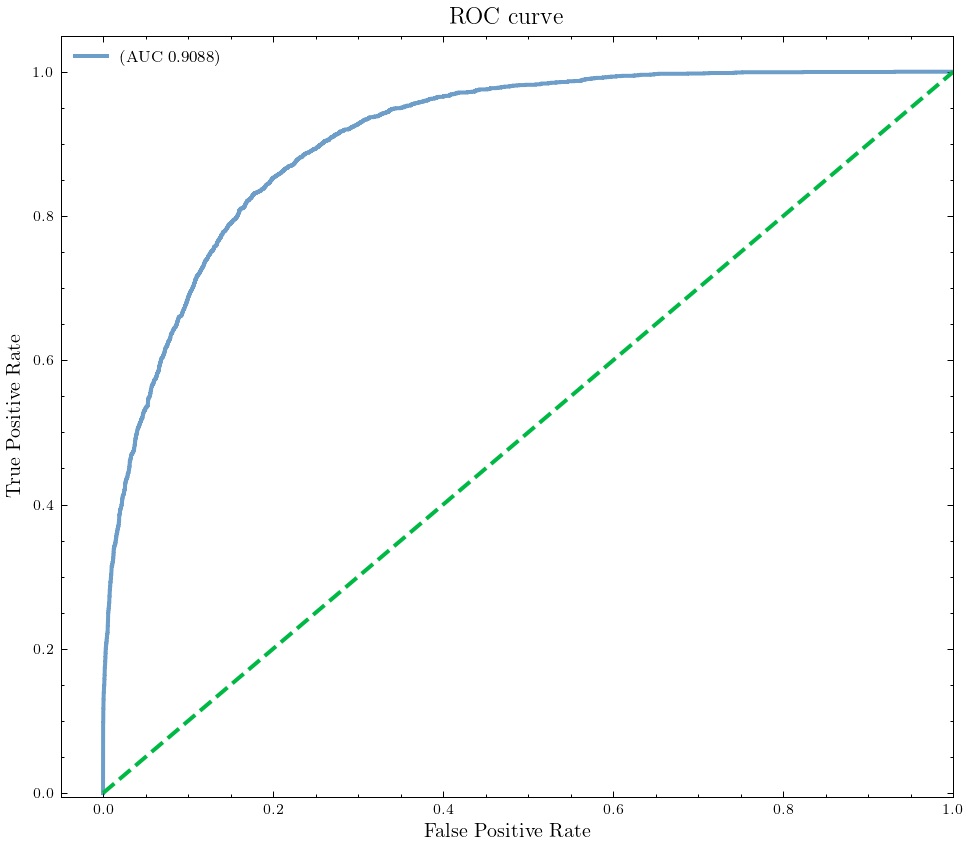

In [41]:
Logit.roc_curve_plot(filepath='',figsave=False)

In [42]:
size_pct = 0.3 # 训练集的比例
rn = 0 #随机种子号
Xdata = nonlinear_sndf_train.iloc[:,1:]
Ydata = nonlinear_sndf_train.iloc[:,0]
model_name = CatBoostClassifier
CATBoost = Classifiers(model_name)
CATBoost.setmodelparam(model_name)
CATBoost.setdata(Xdata,Ydata)
CATBoost.fit_model()

Learning rate set to 0.04221
0:	learn: 0.6489539	total: 195ms	remaining: 3m 14s
1:	learn: 0.6089019	total: 207ms	remaining: 1m 43s
2:	learn: 0.5732134	total: 217ms	remaining: 1m 12s
3:	learn: 0.5464760	total: 228ms	remaining: 56.8s
4:	learn: 0.5211798	total: 240ms	remaining: 47.8s
5:	learn: 0.4965565	total: 249ms	remaining: 41.3s
6:	learn: 0.4774514	total: 258ms	remaining: 36.6s
7:	learn: 0.4611837	total: 267ms	remaining: 33.1s
8:	learn: 0.4453714	total: 277ms	remaining: 30.5s
9:	learn: 0.4308647	total: 286ms	remaining: 28.3s
10:	learn: 0.4171100	total: 296ms	remaining: 26.6s
11:	learn: 0.4068378	total: 305ms	remaining: 25.1s
12:	learn: 0.3980009	total: 316ms	remaining: 24s
13:	learn: 0.3905589	total: 328ms	remaining: 23.1s
14:	learn: 0.3836053	total: 340ms	remaining: 22.3s
15:	learn: 0.3772365	total: 351ms	remaining: 21.6s
16:	learn: 0.3712182	total: 362ms	remaining: 20.9s
17:	learn: 0.3663200	total: 373ms	remaining: 20.3s
18:	learn: 0.3612482	total: 383ms	remaining: 19.8s
19:	learn: 

167:	learn: 0.2805634	total: 2.19s	remaining: 10.9s
168:	learn: 0.2804712	total: 2.21s	remaining: 10.8s
169:	learn: 0.2804112	total: 2.22s	remaining: 10.8s
170:	learn: 0.2802957	total: 2.24s	remaining: 10.9s
171:	learn: 0.2801774	total: 2.25s	remaining: 10.9s
172:	learn: 0.2800577	total: 2.27s	remaining: 10.9s
173:	learn: 0.2799355	total: 2.28s	remaining: 10.8s
174:	learn: 0.2798251	total: 2.3s	remaining: 10.8s
175:	learn: 0.2797276	total: 2.31s	remaining: 10.8s
176:	learn: 0.2796265	total: 2.33s	remaining: 10.8s
177:	learn: 0.2794637	total: 2.34s	remaining: 10.8s
178:	learn: 0.2793774	total: 2.35s	remaining: 10.8s
179:	learn: 0.2792073	total: 2.37s	remaining: 10.8s
180:	learn: 0.2791209	total: 2.38s	remaining: 10.8s
181:	learn: 0.2790660	total: 2.4s	remaining: 10.8s
182:	learn: 0.2789707	total: 2.41s	remaining: 10.8s
183:	learn: 0.2788353	total: 2.43s	remaining: 10.8s
184:	learn: 0.2787065	total: 2.44s	remaining: 10.8s
185:	learn: 0.2785787	total: 2.46s	remaining: 10.8s
186:	learn: 0.

330:	learn: 0.2658079	total: 4.6s	remaining: 9.29s
331:	learn: 0.2657372	total: 4.62s	remaining: 9.29s
332:	learn: 0.2657060	total: 4.63s	remaining: 9.28s
333:	learn: 0.2655413	total: 4.65s	remaining: 9.27s
334:	learn: 0.2652969	total: 4.66s	remaining: 9.26s
335:	learn: 0.2652518	total: 4.68s	remaining: 9.24s
336:	learn: 0.2651463	total: 4.69s	remaining: 9.23s
337:	learn: 0.2650840	total: 4.71s	remaining: 9.22s
338:	learn: 0.2650008	total: 4.72s	remaining: 9.2s
339:	learn: 0.2648206	total: 4.73s	remaining: 9.19s
340:	learn: 0.2647702	total: 4.75s	remaining: 9.18s
341:	learn: 0.2647197	total: 4.76s	remaining: 9.16s
342:	learn: 0.2646544	total: 4.78s	remaining: 9.15s
343:	learn: 0.2644961	total: 4.79s	remaining: 9.14s
344:	learn: 0.2644541	total: 4.81s	remaining: 9.13s
345:	learn: 0.2644284	total: 4.83s	remaining: 9.12s
346:	learn: 0.2643418	total: 4.84s	remaining: 9.12s
347:	learn: 0.2642676	total: 4.86s	remaining: 9.1s
348:	learn: 0.2642411	total: 4.87s	remaining: 9.09s
349:	learn: 0.2

495:	learn: 0.2563788	total: 7.19s	remaining: 7.3s
496:	learn: 0.2563412	total: 7.2s	remaining: 7.29s
497:	learn: 0.2563204	total: 7.21s	remaining: 7.27s
498:	learn: 0.2562828	total: 7.23s	remaining: 7.26s
499:	learn: 0.2562547	total: 7.24s	remaining: 7.24s
500:	learn: 0.2561164	total: 7.25s	remaining: 7.22s
501:	learn: 0.2560391	total: 7.27s	remaining: 7.21s
502:	learn: 0.2560089	total: 7.28s	remaining: 7.19s
503:	learn: 0.2559771	total: 7.29s	remaining: 7.18s
504:	learn: 0.2559377	total: 7.31s	remaining: 7.16s
505:	learn: 0.2559103	total: 7.32s	remaining: 7.15s
506:	learn: 0.2558520	total: 7.33s	remaining: 7.13s
507:	learn: 0.2558241	total: 7.35s	remaining: 7.12s
508:	learn: 0.2557763	total: 7.36s	remaining: 7.1s
509:	learn: 0.2557192	total: 7.37s	remaining: 7.08s
510:	learn: 0.2556510	total: 7.39s	remaining: 7.07s
511:	learn: 0.2556099	total: 7.4s	remaining: 7.06s
512:	learn: 0.2555635	total: 7.42s	remaining: 7.04s
513:	learn: 0.2555130	total: 7.43s	remaining: 7.03s
514:	learn: 0.25

665:	learn: 0.2492420	total: 9.6s	remaining: 4.81s
666:	learn: 0.2491792	total: 9.61s	remaining: 4.8s
667:	learn: 0.2491561	total: 9.63s	remaining: 4.78s
668:	learn: 0.2491260	total: 9.64s	remaining: 4.77s
669:	learn: 0.2490854	total: 9.65s	remaining: 4.75s
670:	learn: 0.2490375	total: 9.67s	remaining: 4.74s
671:	learn: 0.2489868	total: 9.68s	remaining: 4.72s
672:	learn: 0.2489642	total: 9.69s	remaining: 4.71s
673:	learn: 0.2489342	total: 9.71s	remaining: 4.69s
674:	learn: 0.2488828	total: 9.72s	remaining: 4.68s
675:	learn: 0.2488438	total: 9.73s	remaining: 4.66s
676:	learn: 0.2487820	total: 9.74s	remaining: 4.65s
677:	learn: 0.2487612	total: 9.76s	remaining: 4.63s
678:	learn: 0.2487137	total: 9.77s	remaining: 4.62s
679:	learn: 0.2486717	total: 9.78s	remaining: 4.6s
680:	learn: 0.2486394	total: 9.8s	remaining: 4.59s
681:	learn: 0.2486111	total: 9.81s	remaining: 4.57s
682:	learn: 0.2485918	total: 9.82s	remaining: 4.56s
683:	learn: 0.2485606	total: 9.83s	remaining: 4.54s
684:	learn: 0.24

830:	learn: 0.2437733	total: 11.7s	remaining: 2.38s
831:	learn: 0.2437389	total: 11.7s	remaining: 2.37s
832:	learn: 0.2436824	total: 11.8s	remaining: 2.35s
833:	learn: 0.2436161	total: 11.8s	remaining: 2.34s
834:	learn: 0.2435906	total: 11.8s	remaining: 2.33s
835:	learn: 0.2435678	total: 11.8s	remaining: 2.31s
836:	learn: 0.2435486	total: 11.8s	remaining: 2.3s
837:	learn: 0.2435304	total: 11.8s	remaining: 2.28s
838:	learn: 0.2434822	total: 11.8s	remaining: 2.27s
839:	learn: 0.2433895	total: 11.8s	remaining: 2.25s
840:	learn: 0.2433650	total: 11.9s	remaining: 2.24s
841:	learn: 0.2433386	total: 11.9s	remaining: 2.23s
842:	learn: 0.2433071	total: 11.9s	remaining: 2.21s
843:	learn: 0.2432647	total: 11.9s	remaining: 2.2s
844:	learn: 0.2432431	total: 11.9s	remaining: 2.19s
845:	learn: 0.2431915	total: 11.9s	remaining: 2.17s
846:	learn: 0.2431464	total: 11.9s	remaining: 2.16s
847:	learn: 0.2431370	total: 11.9s	remaining: 2.14s
848:	learn: 0.2431245	total: 12s	remaining: 2.13s
849:	learn: 0.24

992:	learn: 0.2387327	total: 13.9s	remaining: 98ms
993:	learn: 0.2386815	total: 13.9s	remaining: 84ms
994:	learn: 0.2386559	total: 13.9s	remaining: 70ms
995:	learn: 0.2386520	total: 13.9s	remaining: 56ms
996:	learn: 0.2386016	total: 14s	remaining: 42ms
997:	learn: 0.2385832	total: 14s	remaining: 28ms
998:	learn: 0.2385524	total: 14s	remaining: 14ms
999:	learn: 0.2384906	total: 14s	remaining: 0us


In [43]:
CATBoost.confusion_matrix_train()

Classification report (training):
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     20680
           1       0.84      0.70      0.76      6509

    accuracy                           0.89     27189
   macro avg       0.87      0.83      0.85     27189
weighted avg       0.89      0.89      0.89     27189



In [44]:
CATBoost.confusion_matrix_test()

Classification report (testing):
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      8843
           1       0.78      0.64      0.71      2810

    accuracy                           0.87     11653
   macro avg       0.84      0.79      0.81     11653
weighted avg       0.87      0.87      0.87     11653



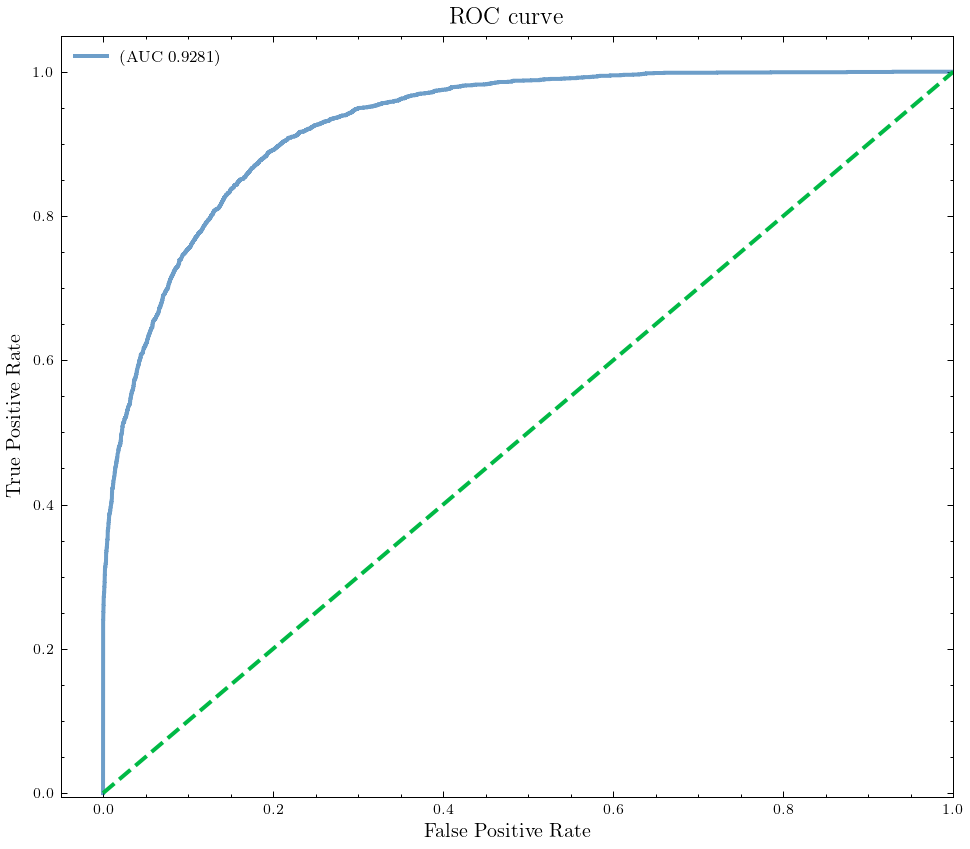

In [45]:
CATBoost.roc_curve_plot(filepath='images/roc_of_CATBoost.pdf',figsave=True)

In [46]:
size_pct = 0.3 # 训练集的比例
rn = 0 #随机种子号
Xdata = nonlinear_sndf_train.iloc[:,1:]
Ydata = nonlinear_sndf_train.iloc[:,0]
model_name = XGBClassifier
XGBoost = Classifiers(model_name)
XGBoost.setmodelparam(model_name,eval_metric=['logloss','auc','error'])
XGBoost.setdata(Xdata,Ydata)
XGBoost.fit_model()

In [47]:
XGBoost.confusion_matrix_train()

Classification report (training):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     20680
           1       0.83      0.70      0.76      6509

    accuracy                           0.89     27189
   macro avg       0.87      0.83      0.85     27189
weighted avg       0.89      0.89      0.89     27189



In [48]:
XGBoost.confusion_matrix_test()

Classification report (testing):
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      8843
           1       0.77      0.65      0.71      2810

    accuracy                           0.87     11653
   macro avg       0.83      0.79      0.81     11653
weighted avg       0.86      0.87      0.87     11653



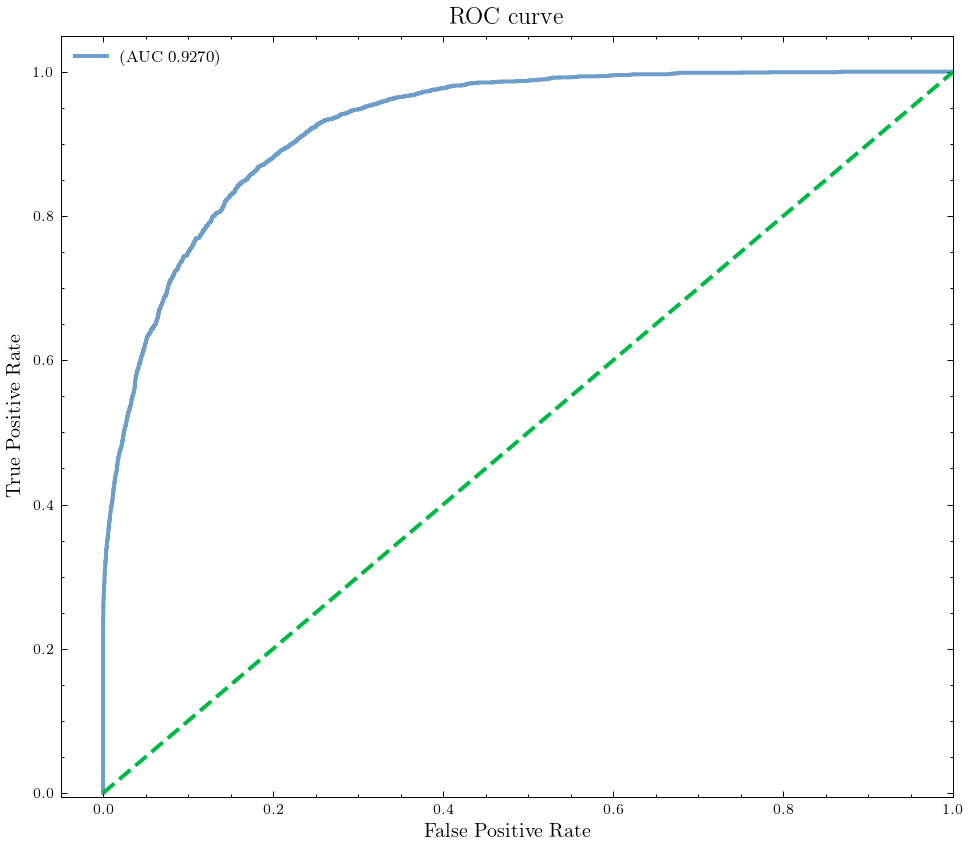

In [49]:
XGBoost.roc_curve_plot(filepath='',figsave=False)

In [50]:
size_pct = 0.3 # 训练集的比例
rn = 0 #随机种子号
Xdata = nonlinear_sndf_train.iloc[:,1:]
Ydata = nonlinear_sndf_train.iloc[:,0]
model_name = LGBMClassifier

In [51]:
Ltgbm = Classifiers(model_name)
# Ltgbm.setmodelparam(model_name,max_depth=6,num_leaves=35,bagging_fraction=0.6,feature_fraction=1,
#                                                  lambda_l1=0.7,lambda_l2=0)
Ltgbm.setmodelparam(model_name)
Ltgbm.setdata(Xdata,Ydata)
Ltgbm.fit_model()

In [52]:
Ltgbm.confusion_matrix_test()

Classification report (testing):
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      8843
           1       0.78      0.65      0.71      2810

    accuracy                           0.87     11653
   macro avg       0.84      0.80      0.81     11653
weighted avg       0.87      0.87      0.87     11653



In [53]:
Ltgbm.confusion_matrix_train()

Classification report (training):
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     20680
           1       0.81      0.68      0.74      6509

    accuracy                           0.89     27189
   macro avg       0.86      0.82      0.83     27189
weighted avg       0.88      0.89      0.88     27189



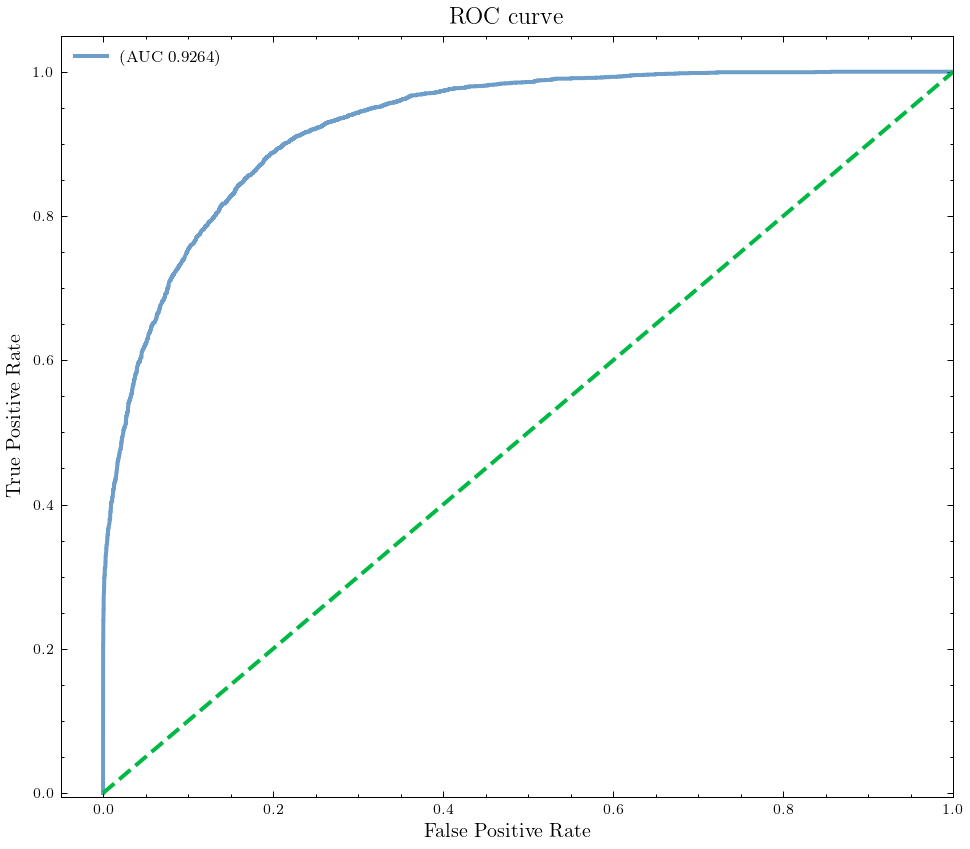

In [54]:
Ltgbm.roc_curve_plot(filepath='',figsave=False)

In [62]:
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=Logit.fpr, y=Logit.tpr,
                    mode='lines',
                    name="Logit({:.4f})".format(Logit.auc)))
fig.add_trace(go.Scatter(x=Logit_0.fpr, y=Logit_0.tpr,
                    mode='lines',
                    name="Logit_0({:.4f})".format(Logit_0.auc)))
fig.add_trace(go.Scatter(x=Logit_1.fpr, y=Logit_1.tpr,
                    mode='lines',
                    name="Logit_1({:.4f})".format(Logit_1.auc)))
fig.add_trace(go.Scatter(x=XGBoost.fpr, y=XGBoost.tpr,
                    mode='lines',
                    name="XGBoost({:.4f})".format(XGBoost.auc)))
fig.add_trace(go.Scatter(x=Ltgbm.fpr, y=Ltgbm.tpr,
                    mode='lines',
                    name="Ltgbm({:.4f})".format(Ltgbm.auc)))
fig.add_trace(go.Scatter(x=CATBoost.fpr, y=CATBoost.tpr,
                    mode='lines',
                    name="CATBoost({:.4f})".format(CATBoost.auc)))
fig.update_layout(
    #title="",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    autosize = False,
    width = 600,
    height = 600,
    legend=dict(traceorder="normal",yanchor="auto",xanchor="right",x=0.95,y=0.05,
               orientation="v")
)
fig.show();
#fig.write_image('images/contrast.png',engine='orca')

In [ ]:
df_test = pd.read_csv('Test.csv')
df_test = df_test.reindex(list(df_train),axis=1,fill_value=0)
df_test = data_clean(df_test)
nonlinear_sndf_test = df_test.reindex(list(nonlinear_ndf_train.columns),axis=1,fill_value=0)

In [ ]:
nonlinear_sndf_test.head

In [ ]:
predictY = pd.DataFrame(XGBoost.model_fitted.predict_proba(nonlinear_sndf_test.iloc[:,1:])[:,1])
predictY.to_csv('Results_1.csv', encoding = 'utf-8', index=False , header=False)
predictY2 = pd.DataFrame(Ltgbm.model_fitted.predict_proba(nonlinear_sndf_test.iloc[:,1:])[:,1])
predictY2.to_csv('Results_2.csv', encoding = 'utf-8', index=False , header=False)
predictY3 = pd.DataFrame(CATBoost.model_fitted.predict_proba(nonlinear_sndf_test.iloc[:,1:])[:,1])
predictY3.to_csv('Results_3.csv', encoding = 'utf-8', index=False , header=False)